In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Loading Data  
titanicData=pd.read_csv("C:\\Users\\busra\\OneDrive\\Masaüstü\\train.csv")

In [3]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Number of Rows and Columns
titanicData.shape

(891, 12)

In [5]:
#Get some Information
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Check the number of Missing Values in each Column
titanicData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Handling the Missing Values
#1."Cabin" Column
titanicData=titanicData.drop(columns='Cabin',axis=1)

In [8]:
#2."Age" Column  replacing the missing values avearage age
titanicData["Age"].fillna(titanicData["Age"].mean(),inplace=True)

In [9]:
#3."Embarked" Column with finding mode
titanicData["Embarked"].value_counts()
print(titanicData["Embarked"].mode())
titanicData["Embarked"].fillna(titanicData["Embarked"].mode()[0],inplace=True)

0    S
Name: Embarked, dtype: object


In [10]:
titanicData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
#Data Analysis
titanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#Finding the number of people survived-not survived
titanicData["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
#Data Vvisualization
sns.set()

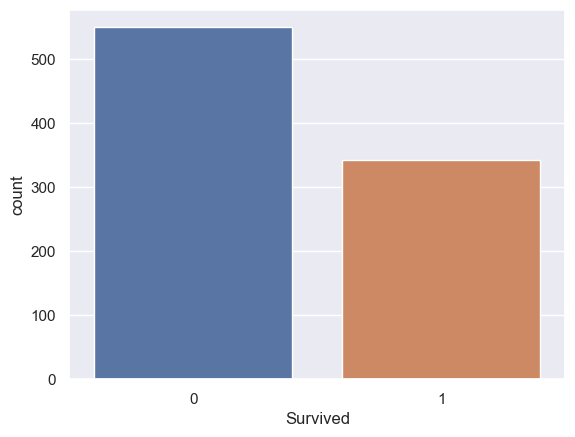

In [14]:
#Making count plot on Survived column
sns.countplot(x='Survived',data=titanicData)
plt.show()

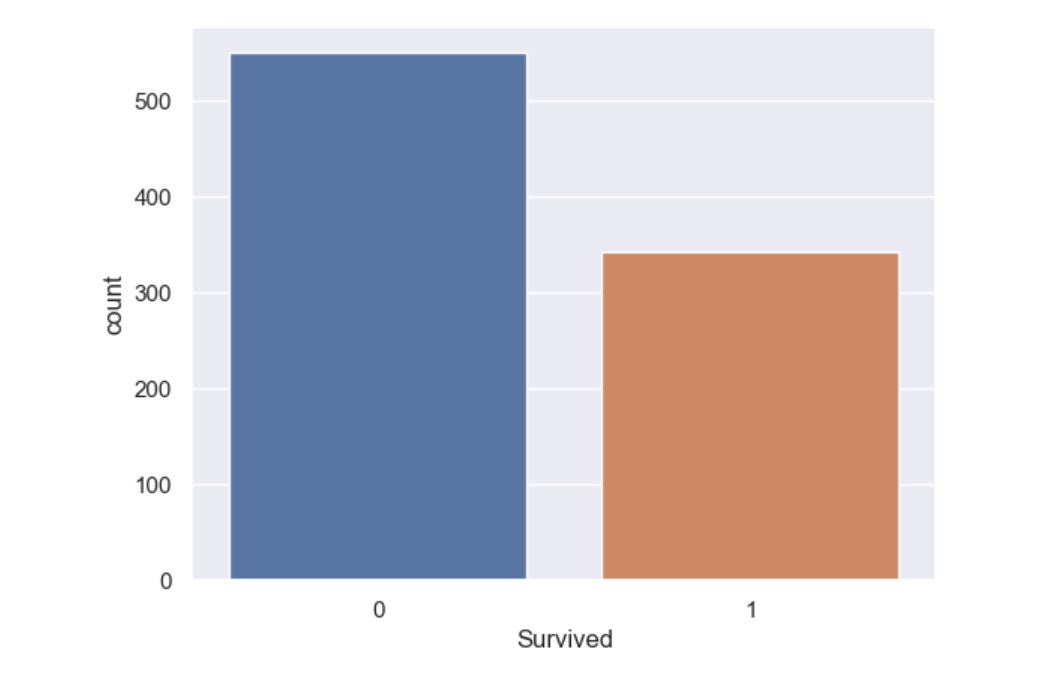

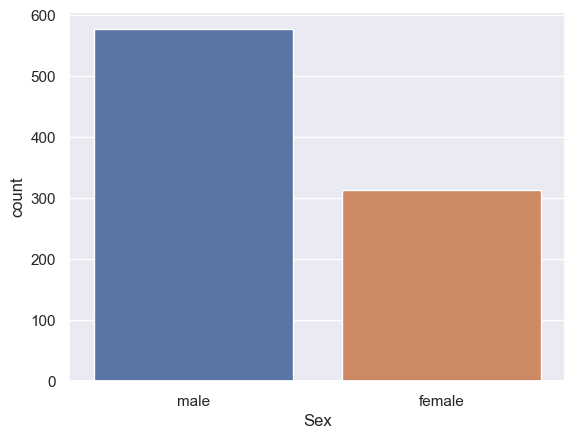

In [15]:
#Making count plot on Sex column
sns.countplot(x='Sex',data=titanicData)
plt.show()

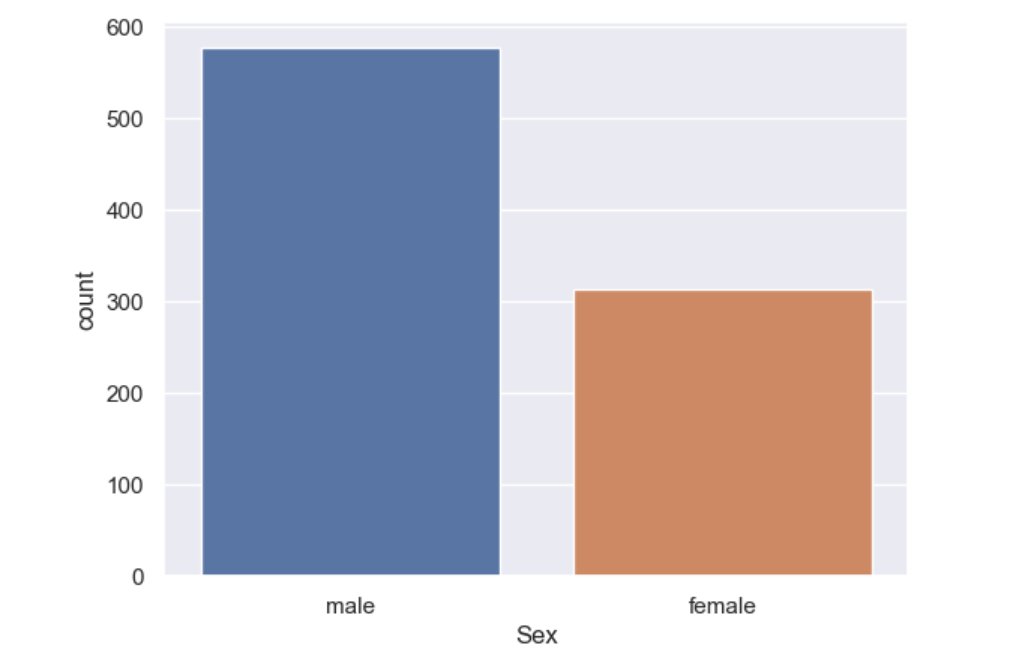

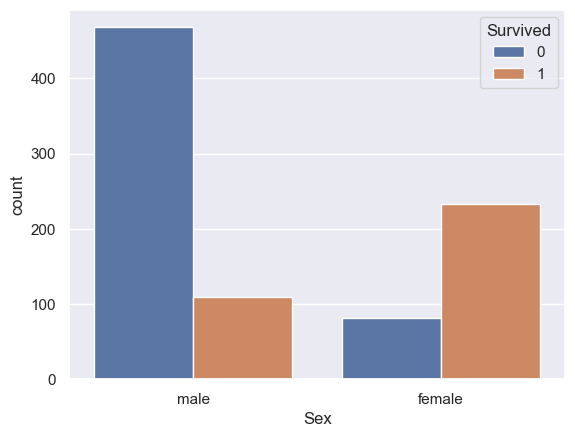

In [16]:
#Number of survivors Gender wise
sns.countplot(x='Sex',hue='Survived',data=titanicData)
plt.show()

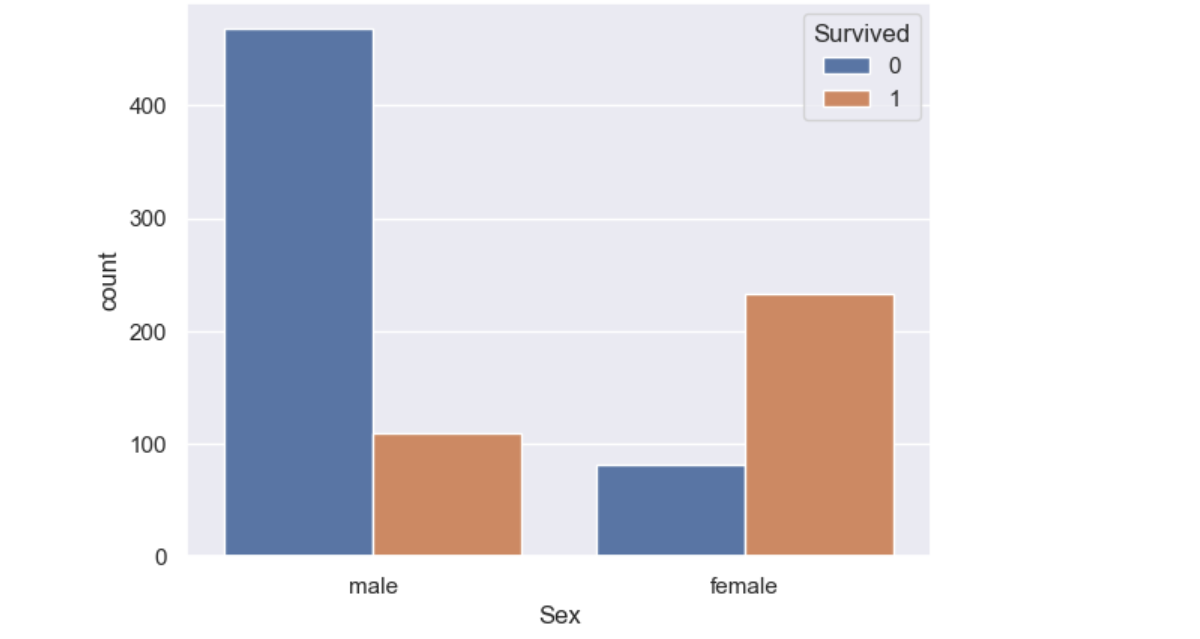

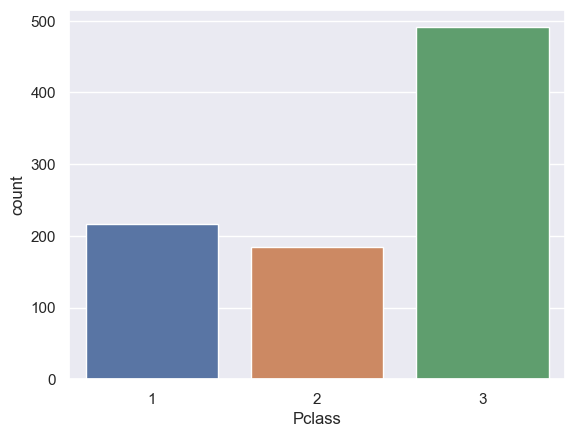

In [17]:
#Making count plot on Pclass column
sns.countplot(x='Pclass',data=titanicData)
plt.show()

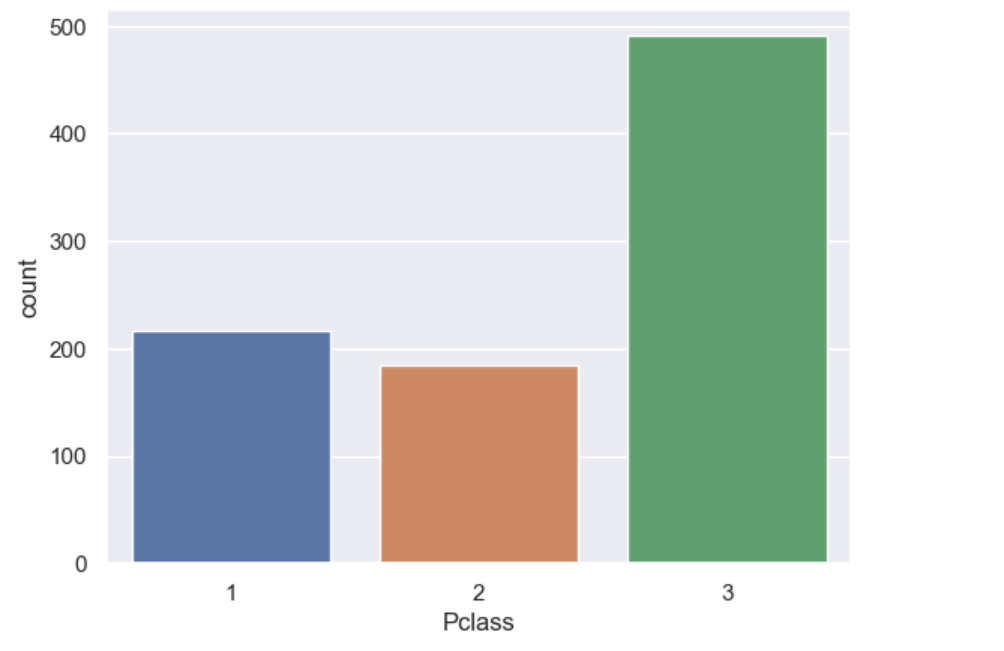

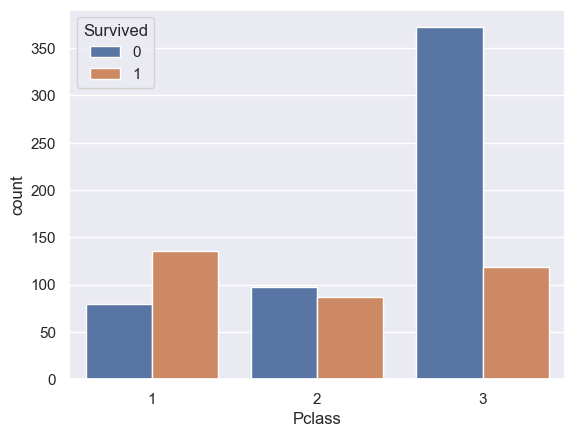

In [18]:
#Number of survivors Pclass wise
sns.countplot(x='Pclass',hue='Survived',data=titanicData)
plt.show()

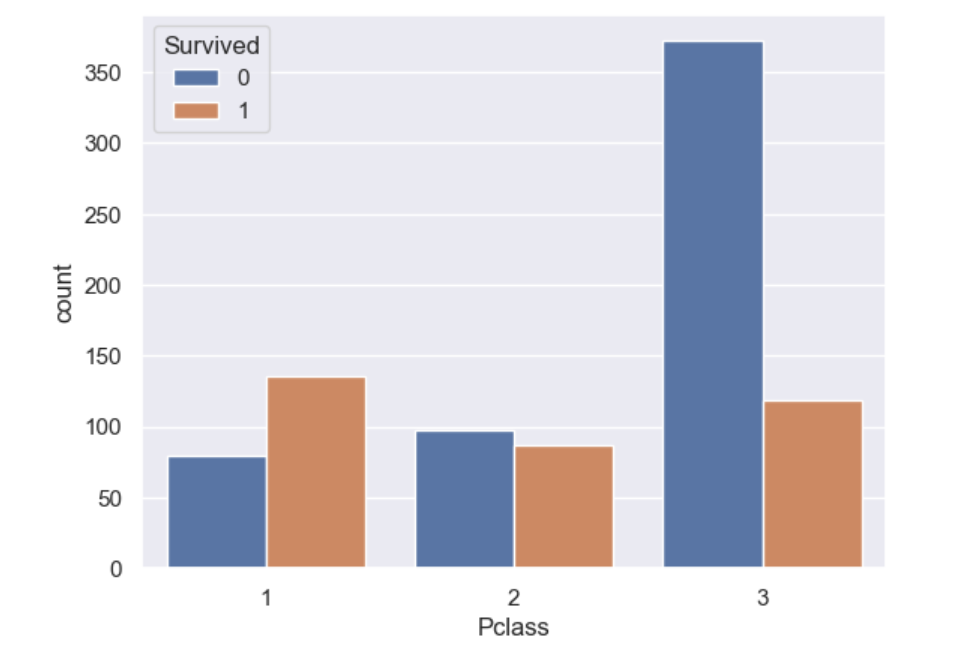

In [19]:
#Recoding the categorical columns
titanicData['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
titanicData['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
#Converting 
titanicData.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [22]:
#Seperating Features and Target
X=titanicData.drop(['PassengerId','Survived','Ticket','Name'],axis=1)
Y=titanicData['Survived']

In [23]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [24]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [25]:
#Split the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
#How many Values
print("X -->shape {} ".format(X.shape))
print("X_train -->shape {} ".format(x_train.shape))
print("X_test -->shape {} ".format(x_test.shape))

X -->shape (891, 7) 
X_train -->shape (712, 7) 
X_test -->shape (179, 7) 


In [27]:
#How many Values
print("Y -->shape {} ".format(Y.shape))
print("Y_train -->shape {} ".format(y_train.shape))
print("Y_test -->shape {} ".format(y_test.shape))

Y -->shape (891,) 
Y_train -->shape (712,) 
Y_test -->shape (179,) 


In [28]:
#Model Training with Logistic Regression
model=LogisticRegression()

In [29]:
#Training Logistic Regression Model
model.fit(x_train,y_train)

C:\Users\busra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#Model Evulation

In [31]:
#Accuracy Score

In [32]:
#Train Data Accuracy Score
x_train_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)
print("Train data accuracy score: {}".format(training_data_accuracy))

Train data accuracy score: 0.8075842696629213


In [33]:
#Test Data Accuracy Score
x_test_predict=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_predict,y_test)
print("Test data accuracy score: {}".format(test_data_accuracy))

Test data accuracy score: 0.7821229050279329
